In [ ]:
#http://qwertytuiyytredsdafghewquroi.ru

# Скачивание либ

In [5]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install dostoevsky
!python -m dostoevsky download fasttext-social-network-model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
#!pip install pandas==1.2.5

In [9]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Импорт и фиксация

In [10]:
import pandas as pd
import json
import numpy as np
import requests
import emoji
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import nltk
import string
from nltk.corpus import stopwords
import emoji

In [12]:
import pymorphy2
from tqdm.notebook import tqdm

In [13]:
import gensim.corpora as corpora
from gensim.models import LdaMulticore, CoherenceModel
from tqdm import tqdm

In [14]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os

In [15]:
from wordcloud import WordCloud
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
from google.colab import drive
drive.mount('/content/drive')
way = "/content/drive/MyDrive/Colab_Notebooks/data_science/datasets/"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Сбор данных

Было выбрано сообщество реальный футбол (https://vk.com/footballru), потому что оно крупное и живое. Дальше идет код сбора данных через апи вк, но он к сожалению не работает в колабе, потому что колаб использует айпи адреса гугла, а вк банит айпишники отличающиеся от оригинального (на котором было сделано приложение)

In [ ]:
vk_config = {"token": "vk1.a.iOemQfb8zDgtDuviwWinaqZdPzKcfZZ-iUMFct_ayQWdcuRayrbDRkoZeEPFxZIK0Ibuw5msV2gNouzuMii5ZxB4VBn3mb_FpTqk5JL7P8pFq2yR_bUqq2cUeBCEDz1tDFPh_Jgpldm4RVGjodEuKVWsrYhopH08LXbYQSEekSkV2sxzcVG8ohdDSaid_n19a2tp-1cAVyCAaUu7BLWkeQ",
             "client_id": "51661257", #ID приложения
             "version": "5.124",
             "domain": "https://api.vk.com/method/"}

In [ ]:
import time


def get_group_id(short_name, token, version):
    url = f'https://api.vk.com/method/utils.resolveScreenName'
    params = {
        'screen_name': short_name,
        'access_token': token,
        'v': version
    }
    response = requests.get(url, params=params).json()
    return -response['response']['object_id']


def get_posts(gr_id, count, offset):
    response = requests.get(
        "https://api.vk.com/method/wall.get",
        params={
            'owner_id': gr_id,
            "access_token": vk_config["token"],
            "v": vk_config["version"],
            "count": count,
            "offset": offset
        }
    )
    return response.json()

def get_comments(gr_id, post_id, token, version, ct):
    tmp_comments = []

    count = 100
    offset = 0

    while True:
        response = requests.get(
            'https://api.vk.com/method/wall.getComments',
            params={
                'owner_id': gr_id,
                'post_id': post_id,
                'access_token': token,
                'v': version,
                'count': min(ct, count),
                'offset': offset
            }
        ).json()

        ct -= count

        if 'response' not in response or not response['response']['items']:
            break

        tmp_comments.extend(response['response']['items'])
        offset += count

        time.sleep(0.5)

    return tmp_comments

In [ ]:
group_id = get_group_id('footballru', vk_config['token'], vk_config['version'])
print(group_id)

all_posts = []


for i in range(0, 1000, 100):
    response = get_posts(group_id, 100, i)
    if 'response' in response:
        all_posts.extend(response['response']['items'])
    else:
        print("Error in response: ", response)
        break

filtered_posts = []
for post in all_posts:
    filtered_post = {
        "likes": post.get('likes', {}).get('count', 0),
        "marked_as_ads": post.get('marked_as_ads', 0),
        "date": post.get('date', ''),
        "text": post.get('text', '')
    }
    filtered_posts.append(filtered_post)

KeyError: ignored

In [ ]:
all_comments = []

for post in all_posts:
    response = get_comments(group_id, post.get('id', ''), vk_config['token'],
                            vk_config['version'], post.get('comments', {}).get('count', 0))
    all_comments.extend(response)

filtered_comments = []
for comm in all_comments:
    filtered_comment = {
        "text": comm.get('text', '')
    }
    filtered_comments.append(filtered_comment)

In [ ]:
with open('posts.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=filtered_posts[0].keys())
    writer.writeheader()
    writer.writerows(filtered_posts)

with open('comments.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=filtered_comments[0].keys())
    writer.writeheader()
    writer.writerows(filtered_comments)

# Работа с данными

In [87]:
dfp = pd.read_csv(way + 'posts_manacost.csv')
dfc = pd.read_csv(way + 'comments_manacost.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
dfp['marked_as_ads'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3

In [89]:
dfp['date'] = pd.to_datetime(dfp['date'], unit='s')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
dfp.iloc[999]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


likes                                                           57
marked_as_ads                                                    0
date                                           2023-01-18 17:25:54
text             Потасовка этой недели: 50 на 50 \n \nВы создае...
Name: 999, dtype: object

In [91]:
dfp.drop(dfp[dfp['marked_as_ads'] == 1].index, inplace=True)
dfp.drop(columns='marked_as_ads', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
dfp.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,likes,date,text
378,38,2023-04-17 15:00:03,"Квест Чернокнижник, которым MAUricio достиг Ле..."
72,44,2023-05-31 11:00:01,"Охотник на тайной магии, которым Jimmypepz взя..."
228,52,2023-05-09 07:00:05,Разработчики решили заранее предупредить об из...
447,45,2023-04-09 07:00:02,Арт новой карты «Звукорежиссер Поззик» и его А...
272,76,2023-05-02 18:25:00,В магазин вернулись облики «Зирелла Искательни...


In [93]:
dfc.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text
2144,мне все равно кажется что этого элема надо баф...
4342,какую колоду забрать?
4391,У вас какая версия игры? У меня до сих пор 26....
6289,NaN
9459,Любителям этого режима хорошо так по губам нас...


In [94]:
df = pd.concat([dfc, dfp['text']], ignore_index=True)
df.drop(columns=[0], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
df = df.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10201, 1)

Проводим токенизацию, затем удаляем стоп слова и знаки препинания, т.к. нам нужны слова. разбор предложений мы не трогаем

In [97]:
df['text'] = df['text'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-97-e72252b4a215>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].astype(str)


In [98]:
df['text'] = df['text'].apply(lambda s: emoji.replace_emoji(s, ''))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
nltk.download('punkt')
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
df['tokenized_text'] = df['text'].apply(nltk.word_tokenize)

df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [word.lower() for word in x])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in (string.punctuation + '...' + '\'' + '\«' + '\"' + '\'\'')])

stop_words = stopwords.words('russian')

parasites = ['это', 'а', 'ну', 'я', 'тот', 'в', 'и', 'те', 'который', 'которая', 'вообще', 'ещё', 'такой', 'такая', 'которое', 'такое' ]

parasites2 = ['1x', '2x', '3x', '10'] + list(string.digits)

df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words + parasites + parasites2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
list(string.digits)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [103]:
df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,tokenized_text
2018,Друид-ГЕЙминг,[друид-гейминг]
8340,Есть желающие?,[желающие]
4654,Через час основная масса ливнет и близы ущнают...,"[час, основная, масса, ливнет, близы, ущнают, ..."
1343,Портретом заманивают,"[портретом, заманивают]"
3353,Суки..,[суки]


In [104]:
analyzer = pymorphy2.MorphAnalyzer()

df['tokenized_text'] = df['tokenized_text'].apply(lambda row: [analyzer.parse(token)[0].normal_form for token in row] if isinstance(row, list) else [])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Py

In [105]:
df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,tokenized_text
1795,"У всех там чтоль ""итс тайм""?","[чтоль, ``, итс, тайм]"
7726,"Вы не понимаете, это бурная работа над игрой\n...","[понимать, бурный, работа, игра, разработчик, ..."
4340,"Может кто-то сможет подсказать, куда делась ка...","[кто-то, смочь, подсказать, деться, карта, ``,..."
3011,Что такое 2 призыва в бой? Это просто 2 призыв...,"[призыв, бой, просто, призыв, призыв, бой, моб..."
216,А под браном?!,[браный]


# Анализ данных

In [106]:
all_words = []
for i in df['tokenized_text'].tolist():
  all_words.extend(i)
len(all_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


74585

In [107]:


id2word = corpora.Dictionary(df['tokenized_text'].tolist())
texts = df['tokenized_text'].tolist()
corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
	
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, limit=20, start=2,  step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 18/18 [02:34<00:00,  8.58s/it]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


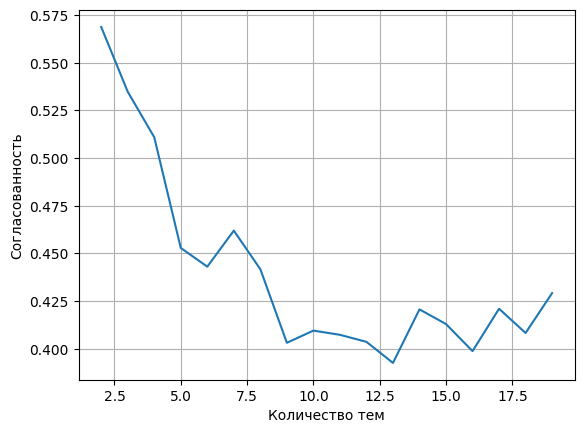

In [109]:
limit=20; start=2; step=1;
x = range(start, limit, step)

data = pd.DataFrame({
    "Количество тем": x,
    "Согласованность": coherence_values
})

sns.lineplot(x="Количество тем", y="Согласованность", data=data)
plt.grid(True)
plt.show()

0 1 2 3 4 5 6 7 8  9  10 11 12 13 14 15 16 17 18 - индекс

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 - темы

---



In [110]:
model_list[5].print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.018*"играть" + 0.009*"слабый" + 0.009*"дк" + 0.009*"карта" + 0.007*"``" + 0.007*"второй" + 0.007*"маг" + 0.006*"который" + 0.006*"хороший" + 0.006*"мета"'),
 (1,
  '0.015*"карта" + 0.013*"ата" + 0.009*"почему" + 0.008*"топ" + 0.008*"колода" + 0.007*"мурлока" + 0.006*"т6" + 0.006*"мерзоцид" + 0.006*"взять" + 0.006*"новый"'),
 (2,
  '0.016*"ход" + 0.015*"играть" + 0.012*"колода" + 0.008*"вольный" + 0.008*"герой" + 0.007*"карта" + 0.007*"абилка" + 0.006*"давать" + 0.006*"мёртвый" + 0.006*"арена"'),
 (3,
  '0.014*"играть" + 0.012*"игра" + 0.011*"карта" + 0.008*"жрец" + 0.008*"купить" + 0.007*"колода" + 0.007*"первый" + 0.006*"друг" + 0.005*"золотой" + 0.005*"нежить"'),
 (4,
  '0.016*"``" + 0.015*"карта" + 0.012*"существо" + 0.011*"очень" + 0.009*"сделать" + 0.008*"играть" + 0.007*"игра" + 0.006*"обнова" + 0.006*"просто" + 0.006*"мой"'),
 (5,
  '0.011*"игра" + 0.008*"карта" + 0.008*"стол" + 0.007*"делать" + 0.007*"просто" + 0.007*"лег" + 0.006*"мета" + 0.006*"дать" + 0.006*"колода

In [112]:
model_list[12].print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.018*"просто" + 0.012*"существо" + 0.012*"купить" + 0.011*"труп" + 0.010*"шаман" + 0.010*"играть" + 0.010*"``" + 0.009*"перерождение" + 0.008*"наконец-то" + 0.007*"герой"'),
 (1,
  '0.016*"первый" + 0.014*"карта" + 0.012*"статья" + 0.011*"вольный" + 0.011*"второй" + 0.010*"ход" + 0.010*"игра" + 0.010*"мерзоцид" + 0.009*"год" + 0.008*"``"'),
 (2,
  '0.049*"играть" + 0.017*"``" + 0.009*"колода" + 0.009*"каждый" + 0.009*"сохранять" + 0.008*"дуэль" + 0.007*"хотеть" + 0.007*"ход" + 0.007*"уметь" + 0.006*"существо"'),
 (3,
  '0.015*"абилка" + 0.013*"т6" + 0.011*"играть" + 0.009*"колода" + 0.008*"золотой" + 0.008*"норма" + 0.008*"биг" + 0.007*"баттл" + 0.007*"применение" + 0.007*"шоумен"'),
 (4,
  '0.018*"ход" + 0.018*"играть" + 0.016*"игра" + 0.011*"герой" + 0.009*"говно" + 0.009*"арена" + 0.009*"почему" + 0.008*"колода" + 0.008*"день" + 0.007*"``"'),
 (5,
  '0.013*"ата" + 0.011*"лег" + 0.011*"друг" + 0.011*"колода" + 0.011*"вариант" + 0.011*"свой" + 0.010*"сикрет" + 0.009*"сам" + 0

In [113]:
model_ch = model_list[5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(model_ch, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.011219  0.017341       1        1  17.138508
3      0.001518 -0.029038       2        1  16.129560
4     -0.046587  0.068928       3        1  15.601700
0     -0.046267 -0.000162       4        1  14.168777
5     -0.085280  0.016864       5        1  13.750340
2      0.037385 -0.141545       6        1  12.716745
1      0.150448  0.067612       7        1  10.494370, topic_info=         Term        Freq       Total Category  logprob  loglift
1882      ата  106.000000  106.000000  Default  30.0000  30.0000
457        ``  376.000000  376.000000  Default  29.0000  29.0000
161     герой  321.000000  321.000000  Default  28.0000  28.0000
708       ход  376.000000  376.000000  Default  27.0000  27.0000
118    слабый  174.000000  174.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
344       год   35.087463  269.594973   Topic7  -5.4075   0.2153
48    хороший   34.145663  243.202341   Topic7  -5.4347   0.2911
708       ход   31.954209  376.834598   Topic7  -5.5011  -0.2132
111   вольный   30.818689  291.042317   Topic7  -5.5372   0.0090
210    играть   30.933112  838.762461   Topic7  -5.5335  -1.0458

[495 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1118      1  0.082513    ....
1118      2  0.041256    ....
1118      3  0.123769    ....
1118      4  0.061884    ....
1118      5  0.680729    ....
...     ...       ...     ...
3118      5  0.952519   шёпот
2466      3  0.050354  эволва
2466      5  0.906376  эволва
504       1  0.859499   элиза
504       5  0.081857   элиза

[1354 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 5, 1, 6, 3, 2])

тема 1 - уход Месси из клуба

тема 2 - матч манчестер сити и реала в лиге чемпионов

тема 3 - лига чемпионов

тема 4 - испанский футбол

тема 5 - голы в матчах

тема 6 - снова реал

# Анализ 2

In [115]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
original_texts = df['text'].tolist()

results = model.predict(original_texts, k=1)
sent = []

for message, sentiment in zip(original_texts, results):
    sent.append(list(sentiment.keys())[0])

df["sentiment"] = sent


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,tokenized_text,sentiment
7932,Мне нравится что среди 49 игр 33 против дк,"[нравиться, среди, 49, игра, 33, против, дк]",neutral
7655,"Только 9 из 40 карт дкшные, хаха, на любой кла...","[40, карта, дкшный, хах, любой, класс, такой, ...",positive
2413,Мне не зашло,[зайти],negative
200,С 1 раза прошёл...причем картами 2 летней давн...,"[раз, пройти, причём, карта, летний, давность]",neutral
924,сколько минидопов уже дают легу на бесполезног...,"[сколько, минидопов, давать, лег, бесполезный,...",negative


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


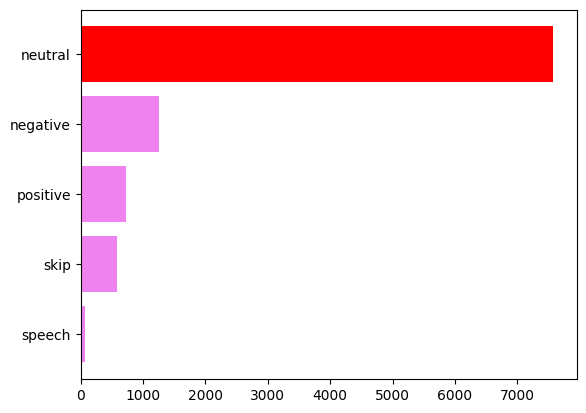

In [118]:
vis = pd.DataFrame(df['sentiment'].value_counts()).sort_values(by="count")

colors = ["violet" for _ in range(4)]+["red"]
plt.barh(y=vis.index, width=vis['count'], color=colors)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


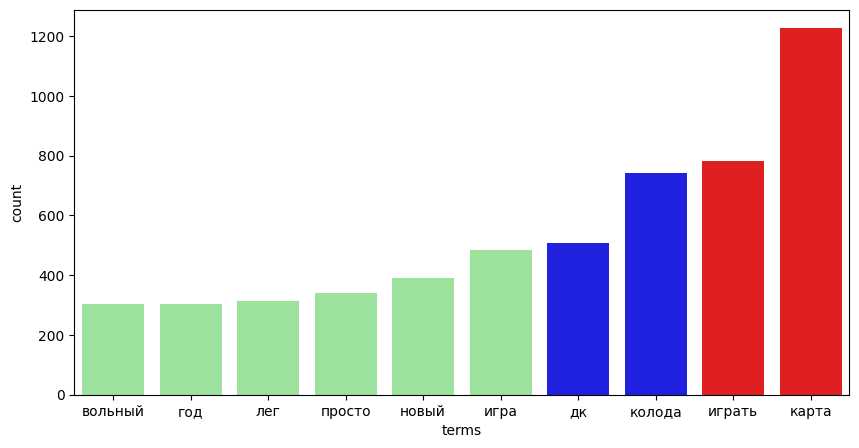

In [119]:
res = pd.DataFrame(all_words, columns=["terms"])
vis = pd.DataFrame(res["terms"].value_counts()).sort_values(by="count", ascending=False)[:10].sort_values(by="count")

colors = ['red' if i < 2 else 'blue' if i < 4 else 'lightgreen' for i in range(vis.shape[0])][::-1]

plt.figure(figsize=(10, 5))
sns.barplot(y=vis["count"], x=vis.index, palette=colors)
plt.show()


In [120]:
from collections import Counter
words = dict(Counter(all_words))
print(len(words))

12174


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


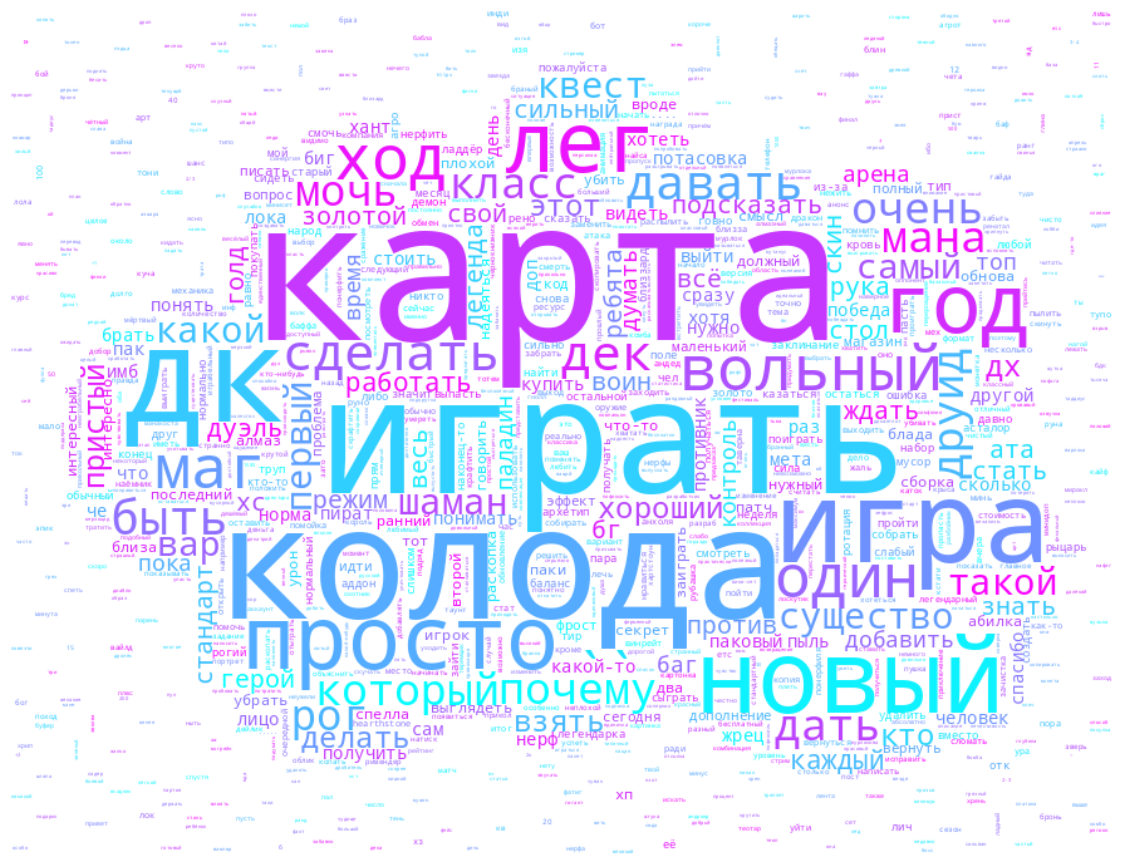

In [121]:
# генерируем маску
url = "https://www.pinclipart.com/picdir/middle/519-5194083_cloud-clipart.png"
response = requests.get(url)
cloud_mask = np.array(Image.open(BytesIO(response.content)))

wc = WordCloud(background_color="white", max_words=2000, mask=cloud_mask, colormap="cool")
wc.generate_from_frequencies(words)

plt.figure(figsize=(15, 11))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

дальше делаем граф

In [122]:
pairs = []
for doc in df['tokenized_text'].tolist():
  if doc:
    b = list((nltk.bigrams(doc)))
    if b:
      pairs.extend(b)
len(pairs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


64462

In [123]:
pairs = [tuple(sorted(pair)) for pair in pairs]
word_pairs = dict(Counter(pairs))
print(len(word_pairs))

52218


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
word_pairs = [(pair[0], pair[1], val) for pair, val in word_pairs.items() if val > 10]
print(len(word_pairs))
word_pairs[:10]

126


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('дк', 'дх', 13),
 ('карта', 'колода', 21),
 ('блада', 'дк', 81),
 ('контроль', 'пристый', 18),
 ('герой', 'сила', 17),
 ('карта', 'этот', 27),
 ('анхоля', 'дк', 27),
 ('квест', 'маг', 12),
 ('карта', 'такой', 16),
 ('два', 'карта', 13)]

In [125]:
!pip install networkx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
from math import gcd
import networkx as nx

G = nx.Graph()
edges = word_pairs
edges[:10], len(edges)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([('дк', 'дх', 13),
  ('карта', 'колода', 21),
  ('блада', 'дк', 81),
  ('контроль', 'пристый', 18),
  ('герой', 'сила', 17),
  ('карта', 'этот', 27),
  ('анхоля', 'дк', 27),
  ('квест', 'маг', 12),
  ('карта', 'такой', 16),
  ('два', 'карта', 13)],
 126)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


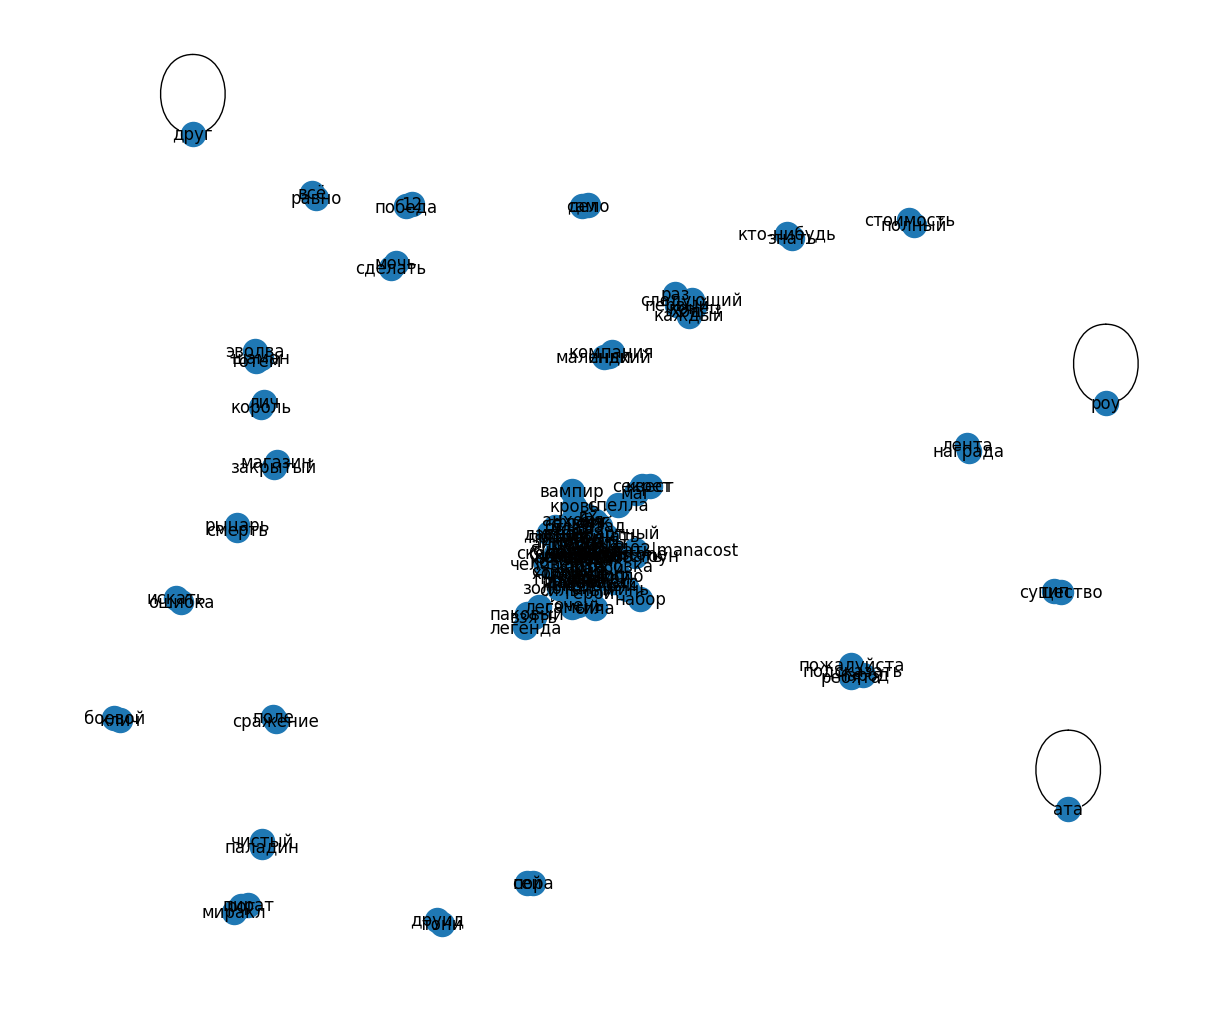

In [127]:
plt.figure(figsize=(12,10))
G.add_weighted_edges_from(edges)
labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


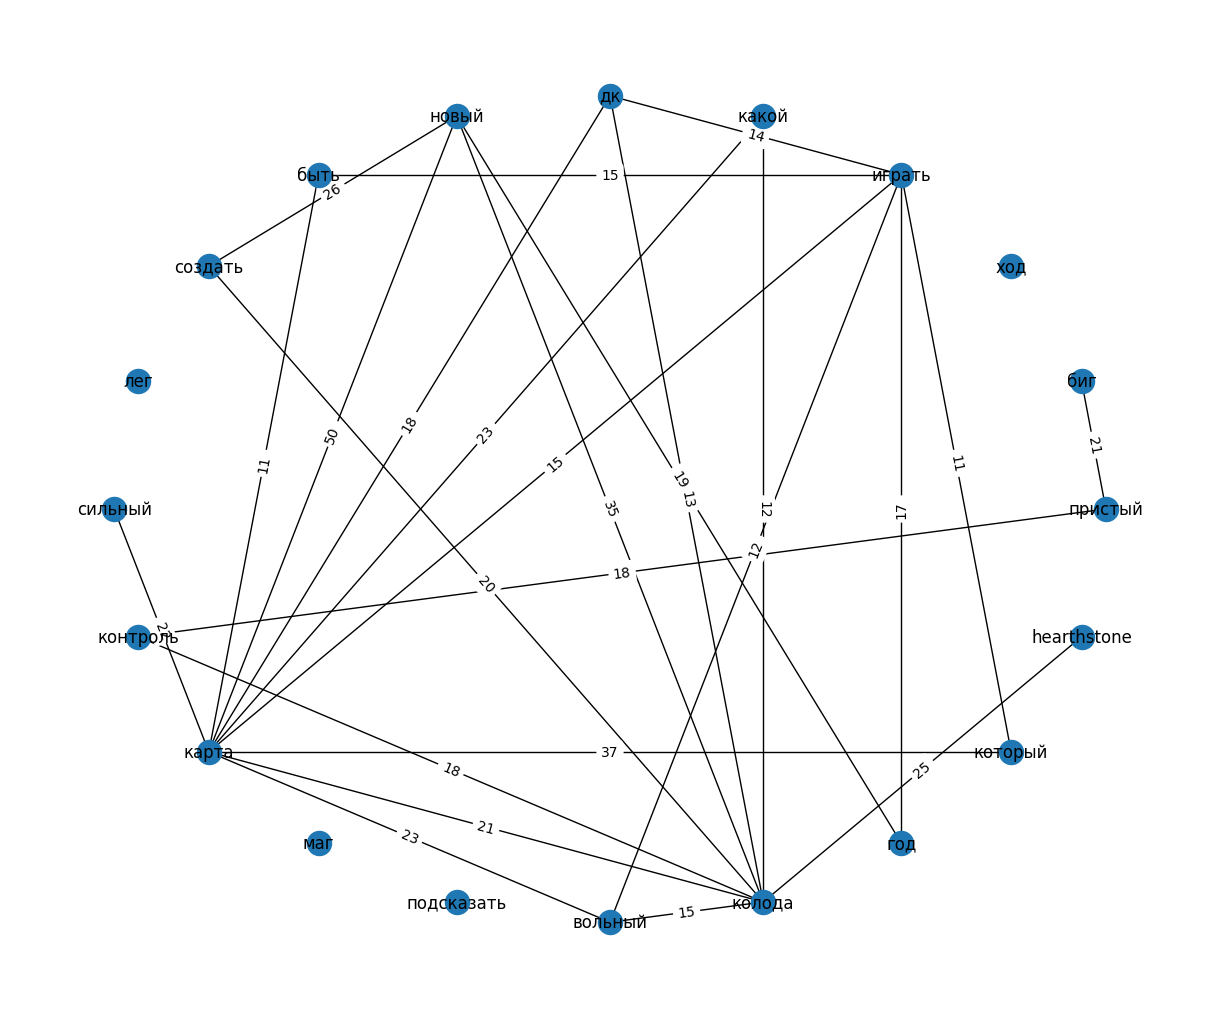

In [128]:
degree_threshold = 2

degrees = G.degree()

nodes_to_keep = [node for node, degree in degrees if degree > degree_threshold]

G_filtered = G.subgraph(nodes_to_keep)

plt.figure(figsize=(12,10))
labels_filtered = nx.get_edge_attributes(G_filtered, 'weight')
pos_filtered = nx.circular_layout(G_filtered)
nx.draw(G_filtered, pos_filtered, with_labels=True)
nx.draw_networkx_edge_labels(G_filtered, pos_filtered, edge_labels=labels_filtered)
plt.show()


In [129]:
remove = [node for node, degree in dict(G.degree()).items() if degree < 2]
G.remove_nodes_from(remove)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
remove_edge = [pair for pair in G.edges() if pair[0] in remove and pair[1] in remove]
G.remove_edges_from(remove_edge)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [131]:
remove = [node for node, degree in dict(G.degree()).items() if degree < 1]
G.remove_nodes_from(remove)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [132]:
node_sizes = [deg*50 for node, deg in dict(G.degree()).items()]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Выводы: можно легко увидеть как большое тематическое сообщество деградирует к постоянным локальным обуждениям одного и того же

# Анализ хса

In [160]:
clases1 = pd.DataFrame(res["terms"].value_counts()).sort_values(by="count", ascending=False).sort_values(by="count")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [161]:
clases1 = clases1.reset_index()
clases1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,terms,count
0,ауткастовый,1
1,восхищаться,1
2,радио,1
3,святой-спокойный,1
4,как-либо,1
...,...,...
12169,игра,485
12170,дк,509
12171,колода,741
12172,играть,782


In [176]:
clases = pd.DataFrame(columns = clases1.columns)
temp1 = pd.DataFrame([{'terms': 'ДК', 'count': clases1[clases1['terms'].isin(['дк'])]['count'].sum()}])
temp2 = pd.DataFrame([{'terms': 'ДХ', 'count': clases1[clases1['terms'].isin(['дх', 'демон'])]['count'].sum()}])
temp3 = pd.DataFrame([{'terms': 'Друид', 'count': clases1[clases1['terms'].isin(['друид'])]['count'].sum()}])
temp4 = pd.DataFrame([{'terms': 'Охотник', 'count': clases1[clases1['terms'].isin(['охотник', 'хант'])]['count'].sum()}])
temp5 = pd.DataFrame([{'terms': 'Маг', 'count': clases1[clases1['terms'].isin(['маг'])]['count'].sum()}])
temp6 = pd.DataFrame([{'terms': 'Шаман', 'count': clases1[clases1['terms'].isin(['шаман'])]['count'].sum()}])
temp7 = pd.DataFrame([{'terms': 'Разбойник', 'count': clases1[clases1['terms'].isin(['рог', 'рогий'])]['count'].sum()}])
temp8 = pd.DataFrame([{'terms': 'Жрец', 'count': clases1[clases1['terms'].isin(['жрец', 'пристый'])]['count'].sum()}])
temp9 = pd.DataFrame([{'terms': 'Паладин', 'count': clases1[clases1['terms'].isin(['паладин', 'пал'])]['count'].sum()}])
temp10 = pd.DataFrame([{'terms': 'Чернокнижник', 'count': clases1[clases1['terms'].isin(['чернокнижник', 'лока'])]['count'].sum()}])
temp11 = pd.DataFrame([{'terms': 'Воин', 'count': clases1[clases1['terms'].isin(['вар', 'воин'])]['count'].sum()}])
clases = pd.concat([clases, temp1, temp2, temp3, temp4, temp5, temp6, temp7, temp8, temp9, temp10, temp11], ignore_index=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [179]:
clases = clases.sort_values(by = 'count')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


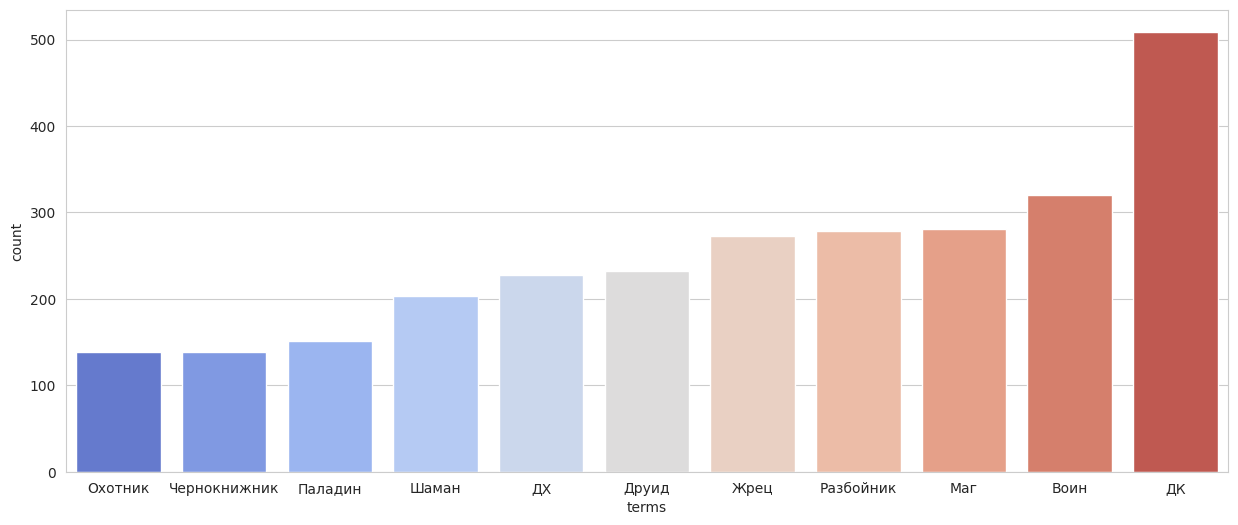

In [180]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))
palette = sns.color_palette("coolwarm", len(clases))
sns.barplot(x='terms', y='count', data=clases, palette=palette)  
plt.show()

In [168]:
clases1[clases1['terms'].isin(['паладин', 'пал', 'пала'])]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,terms,count
11619,пал,25
12100,паладин,126
